<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: 9/14/24</small><br/>
    <small>Section:007</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Henry Lawrence [---%]|Henry Lawrence |2 hrs |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

1. $s(t) = 1 \hspace{10pt} t \in [0,1]$ 

We can setup the sine/cosine forms of the fourier series:

$a_k = \frac{2}{T_0}\int_{\langle T_0 \rangle}s(t)\cos(\frac{2\pi}{T_0}kt)dt = \int_{0}^{1}\cos(\pi k t)dt$  

$b_k = \frac{2}{T_0}\int_{\langle T_0 \rangle}s(t)\sin(\frac{2\pi}{T_0}kt)dt = \int_{0}^{1}\sin(\pi k t)dt$

These integrals evaluate to:

$a_k  = \frac{\sin\left(\pi k\right)}{\pi k}$

$b_k = \frac{2\,{\sin \left(\frac{\pi \,k}{2}\right)}^2 }{k\,\pi }$

$a_0 = 1, b_0 = 0$ by L'hopitals rule 

We can write $s(t)$ in the follwing way:

$s(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty} \left[ a_k \cos(2 \pi f k t) + b_k \sin(2 \pi f k t) \right]$

The generalized Fourier series above can be written as the sum of single cosine using the following trigonometric idenity: 

$a_k \cos(2 \pi f k t) + b_k \sin(2 \pi f k t) = A_k \cos(2 \pi f k t + \theta_k)$

Where $A_k = \sqrt{a_k^2 + b_k^2} $ and $\theta_k = -\arctan(\frac{b_k}{a_k})$

Finally, to convert to the desired form, subtract a $\frac{\pi}{2}$ phase shift from $\theta_k$

$s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)$

Where
$a_0 = 1/2, \hspace{10pt} A_k = \sqrt{a_k^2 + b_k^2} $ and $\theta_k = -\arctan(\frac{b_k}{a_k})-\frac{\pi}{2}$

The definitions of $a_k$ and $b_k$ are given above.



2. $s(t) = \begin{cases} 
\frac{1}{2} & \text{if } |t| \leq \frac{1}{4} \\
-\frac{1}{2} & \text{if } |t| > \frac{1}{4}
\end{cases}$

Following the same steps of the previous problem, the Fourier series integrals are:

$a_k = \int_{-\frac{1}{2}}^{-\frac{1}{4}} -\cos(2 \pi k t) \, dt + \int_{-\frac{1}{4}}^{\frac{1}{4}} \cos(2 \pi k t) \, dt + \int_{\frac{1}{4}}^{\frac{1}{2}} -\cos(2 \pi k t) \, dt$

$b_k = \int_{-\frac{1}{2}}^{-\frac{1}{4}} -\sin(2 \pi k t) \, dt + \int_{-\frac{1}{4}}^{\frac{1}{4}} \sin(2 \pi k t) \, dt + \int_{\frac{1}{4}}^{\frac{1}{2}} -\sin(2 \pi k t) \, dt$

These integrals evaluate to 

$a_k = \frac{\sin \left(\frac{\pi \,k}{2}\right)}{k\,\pi }-\frac{\sin \left(\pi \,k\right)-\sin \left(\frac{\pi \,k}{2}\right)}{k\,\pi }$

$b_k = 0$ (This makes sense, $s(t)$ is even)

Since $b_k = 0$, converting to the sine series just requires $\theta_k = -\frac{\pi}{2} \hspace{5pt} \forall k$

$s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)$

Where $a_0 = 0$ by L'hopitals rule, $A_k = a_k$ and $\theta_k = -\frac{\pi}{2} \hspace{5pt} \forall k$



**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

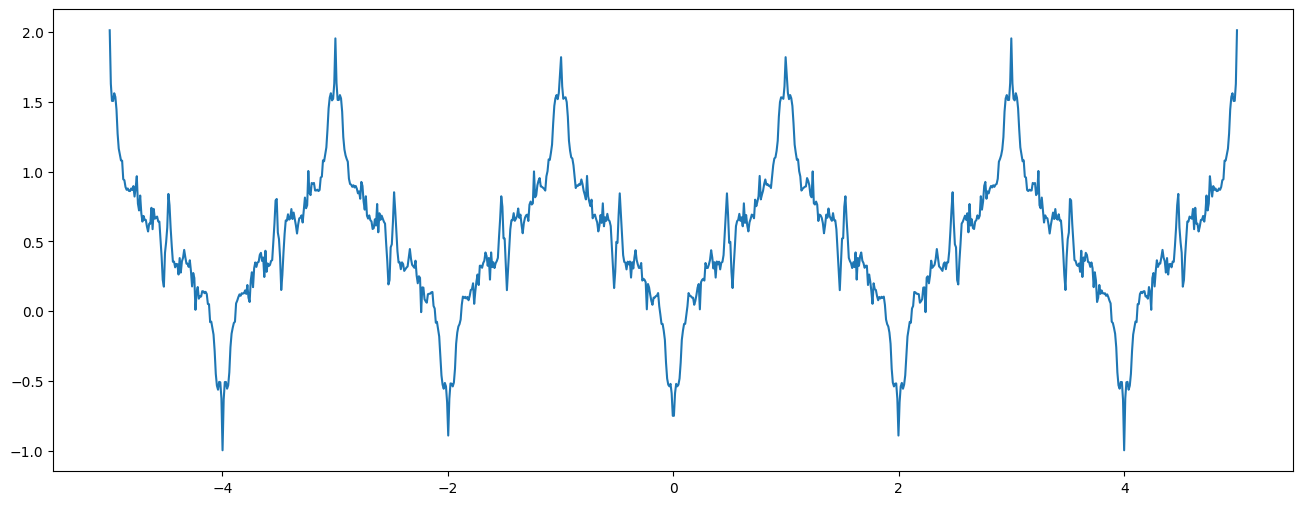

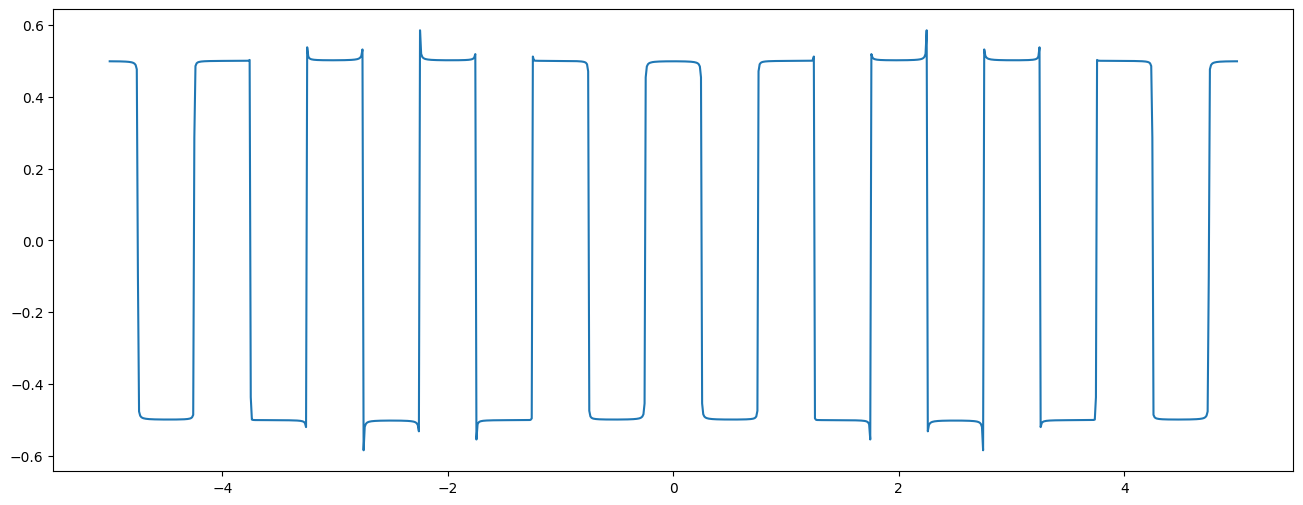

In [4]:
k = np.arange(1,201)
t = np.linspace(-5,5, 1000)
ak1 = np.sin(np.pi*k) / (np.pi * k)
bk1 = 2 * np.sin(np.pi*k/2)*np.sin(np.pi*k/2) / (np.pi*k)
a01 = .5

A1 = np.sqrt(ak1**2 + bk1**2)
theta1 = -np.arctan(bk1/ak1)



ak2 = np.sin((np.pi*k)/2)/(k*np.pi) - (np.sin(np.pi*k) - np.sin((np.pi*k)/2))/(k*np.pi)


def fourier_series(x, offset, a, b, freq):
    result = offset
    N = len(a)  
    
    for n in range(1, N + 1):
        result += a[n-1]*np.cos(2*np.pi*freq*n*x) + b[n-1]*np.sin(2*np.pi*freq*n*x)
    
    return result

def fourier_sine_series(x, offset, A, theta, freq):
    result = offset
    N = len(A)  
    
    for n in range(1, N + 1):
        result += A[n-1]*np.sin(2*np.pi*freq*n*x + theta[n-1])
    
    return result

#s1 = fourier_series(t, a01, ak1, bk1, 1/2)
s1 = fourier_sine_series(t, a01, A1, theta1, 1/2)

s2 = fourier_sine_series(t, 0, ak2, 0*k + np.pi/2, 1)

  
plt.plot(t,s1)
plt.show()

plt.plot(t, s2)
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

insert your plots here

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

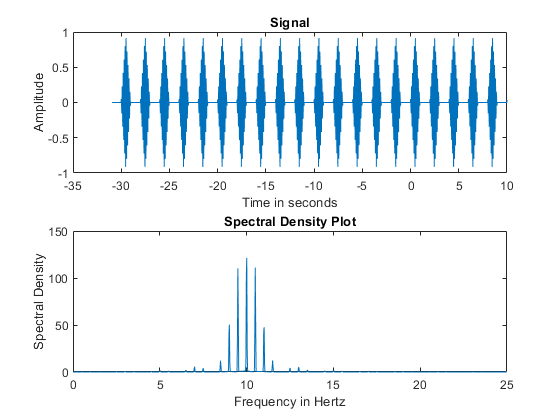 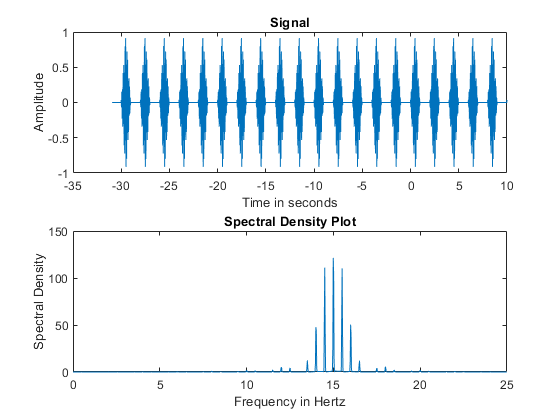 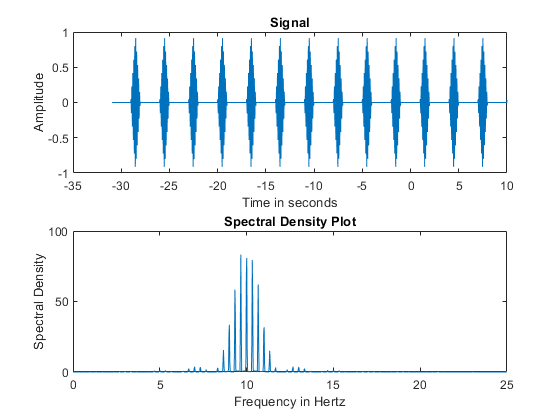 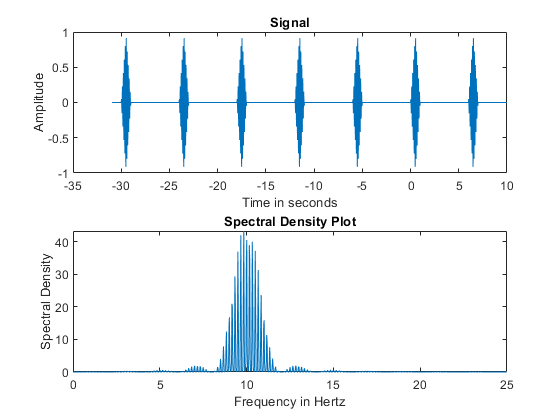

**2. What effect does changing the modulating frequency have on the spectral density?**

Changing the modualting frequency does not have an effect on spectral density

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The spectrum has a comb structure because multiplication in time is convolution in frequency. The distance between the impulse is $\frac{1}{T}$ where T is the period of the repeating sequence

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

As the period grows larger, the distance between impulse would decrease to almost 0. 

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

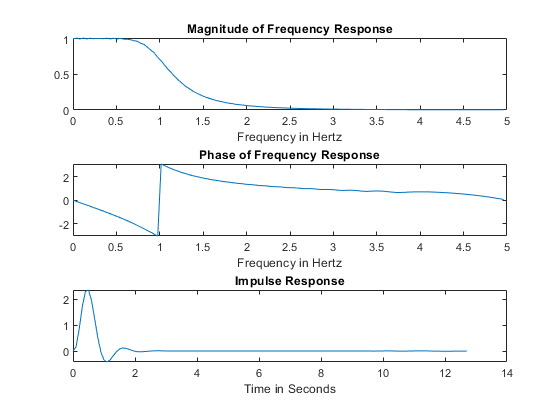

**2. Hand in the plot of the impulse response obtained using a unit step.**

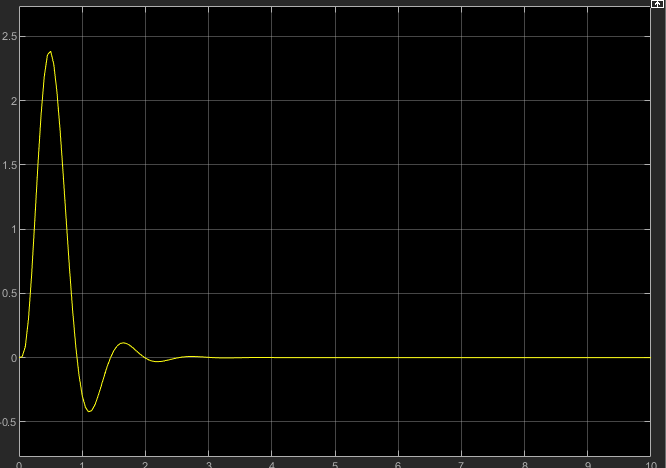

**3. What are the advantages and disadvantages of each method?**

Using the network analyzer provides a much more comprehensive overview of system characteristics with the gain and phase plot, but it requires a specialized piece of equipment. The unit step method is much simpler to setup, but it does not give as much information as the network analyzer.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [45]:


def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    X = np.array(0*w, dtype = 'complex128')
    for n in range(len(x)):
        X += x[n]*np.exp(-1j*w*(n+n0))
        
    return X
    
    
    
   
        

    



**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

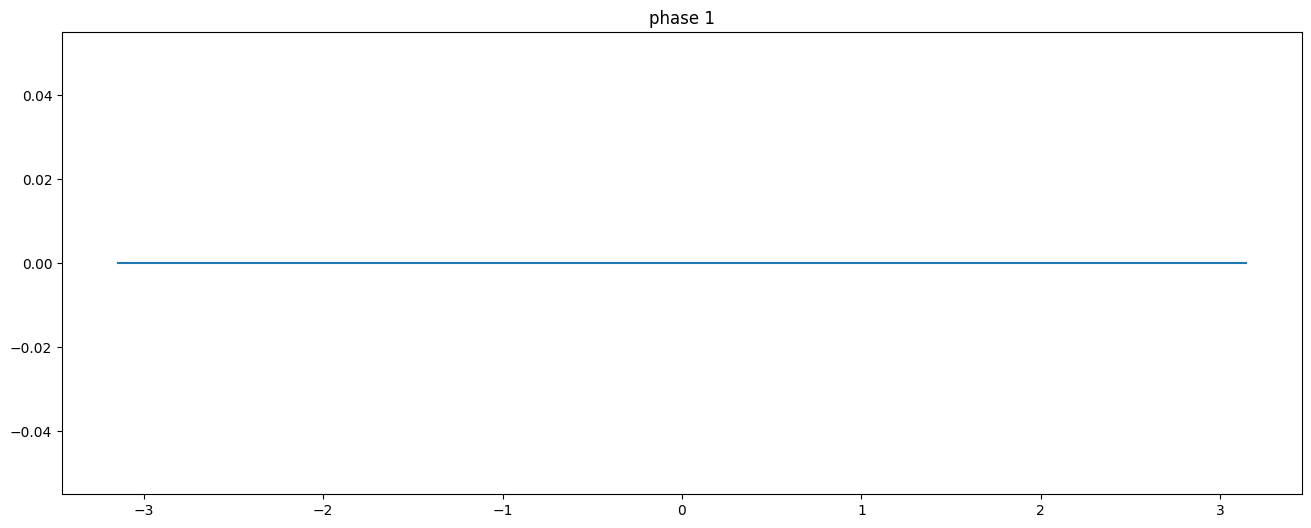

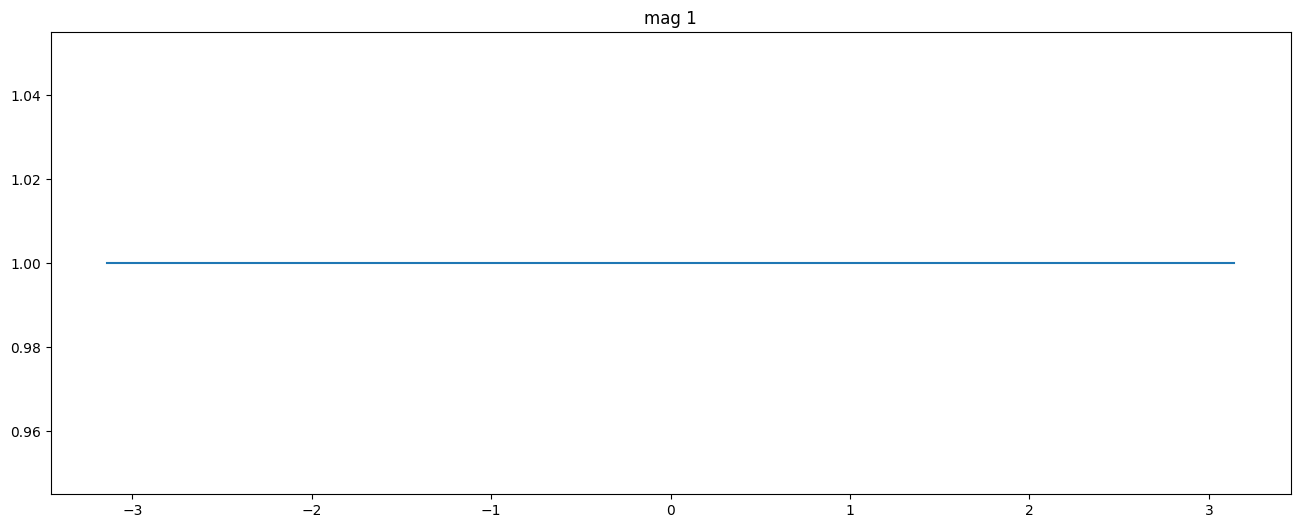

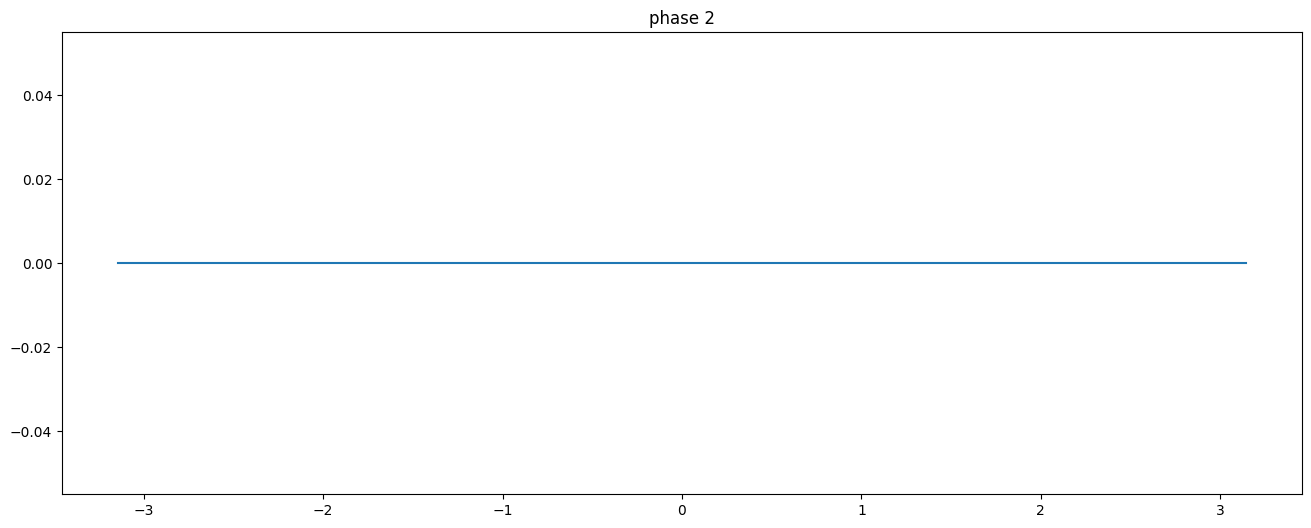

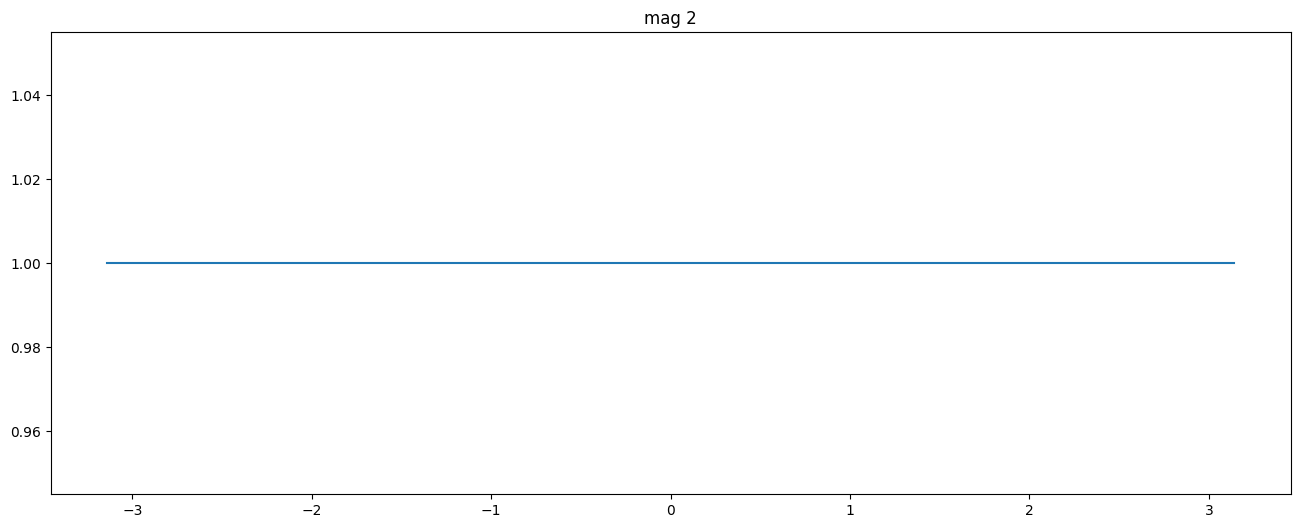

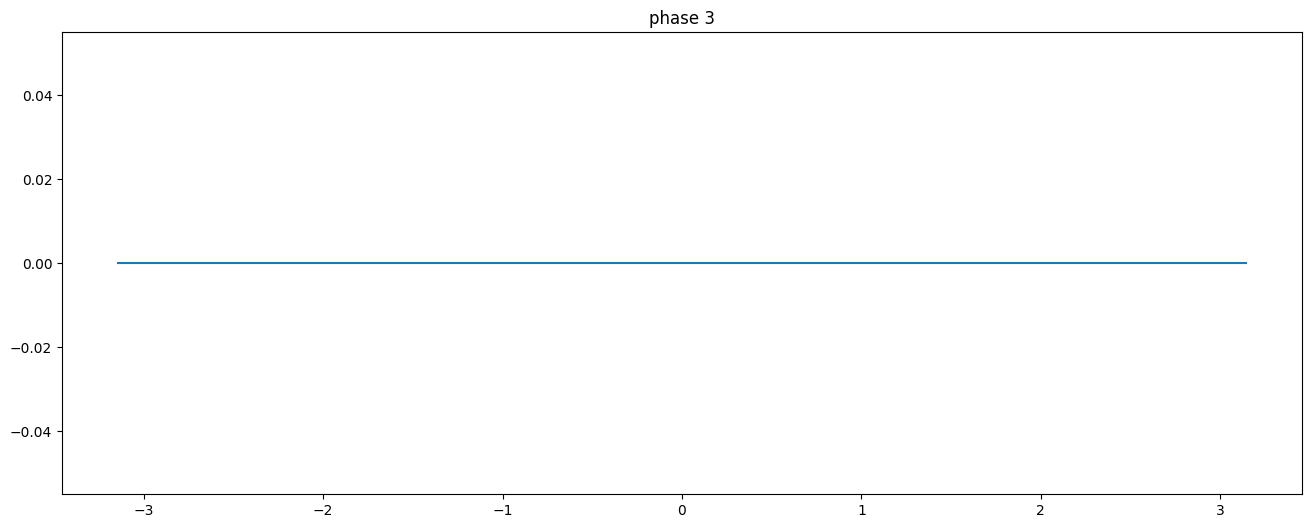

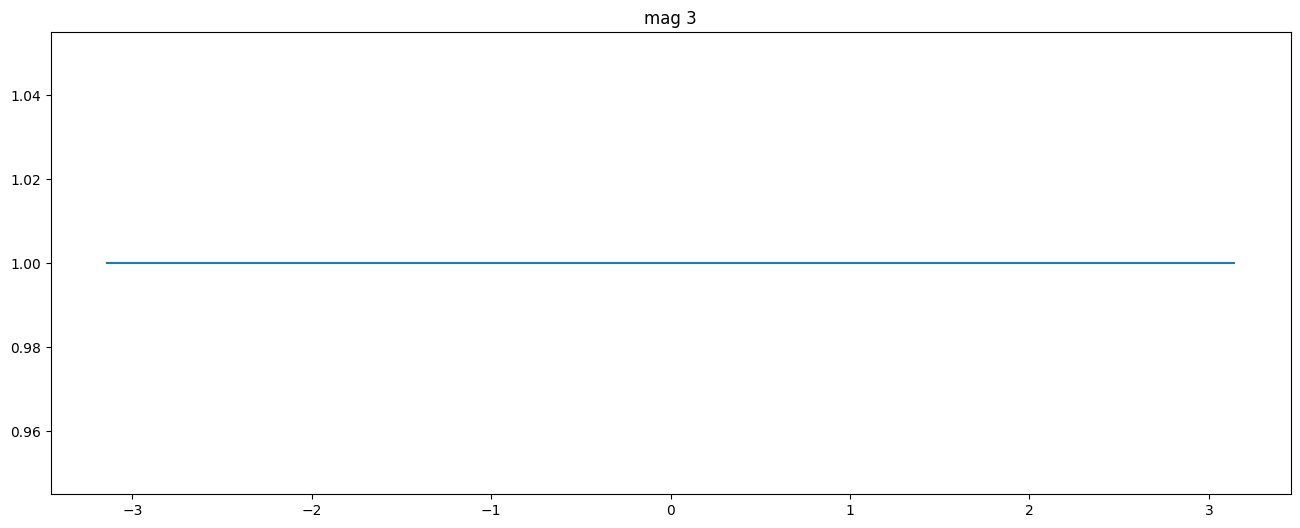

In [53]:
w = np.linspace(-np.pi, np.pi,1000)
n = np.array(range(-10,11))

delta = 0*n
delta[10] = 1

x = delta

n0 = -10

X = DTFT(x, n0, w)
mag = np.abs(X)
phase = np.angle(X)

plt.title("phase 1")
plt.plot(w, phase)
plt.show()

plt.title("mag 1")
plt.plot(w, mag)
plt.show()


delta = 0*n
delta[15] = 1

x = delta

n0 = -15

X = DTFT(x, n0, w)

plt.title("phase 2")
plt.plot(w, phase)
plt.show()

plt.title("mag 2")
plt.plot(w, mag)
plt.show()

x = 0*n
for i in n:
  if i >= 0:
    x[i] = np.power(0.5,i) 
x = delta

n0 = -10

X = DTFT(x, n0, w)

plt.title("phase 3")
plt.plot(w, phase)
plt.show()

plt.title("mag 3")
plt.plot(w, mag)
plt.show()




<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

insert your diagram here

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

$y[n] = 0.9y[n-1] +0.3\delta[n]+0.24\delta[n-1]$

**3. Use your answer in Q2 to obtain the frequency response of the system.**

$ H(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{0.3+0.24e^{-j\omega}}{-0.9e^{-j\omega}}$

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

$Y(\omega) = 0.9Y(\omega)e^{-j\omega}+0.3X(\omega)+0.24X(\omega)e^{-j\omega}$

$H(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{0.3+0.24e^{-j\omega}}{-0.9e^{-j\omega}}$

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

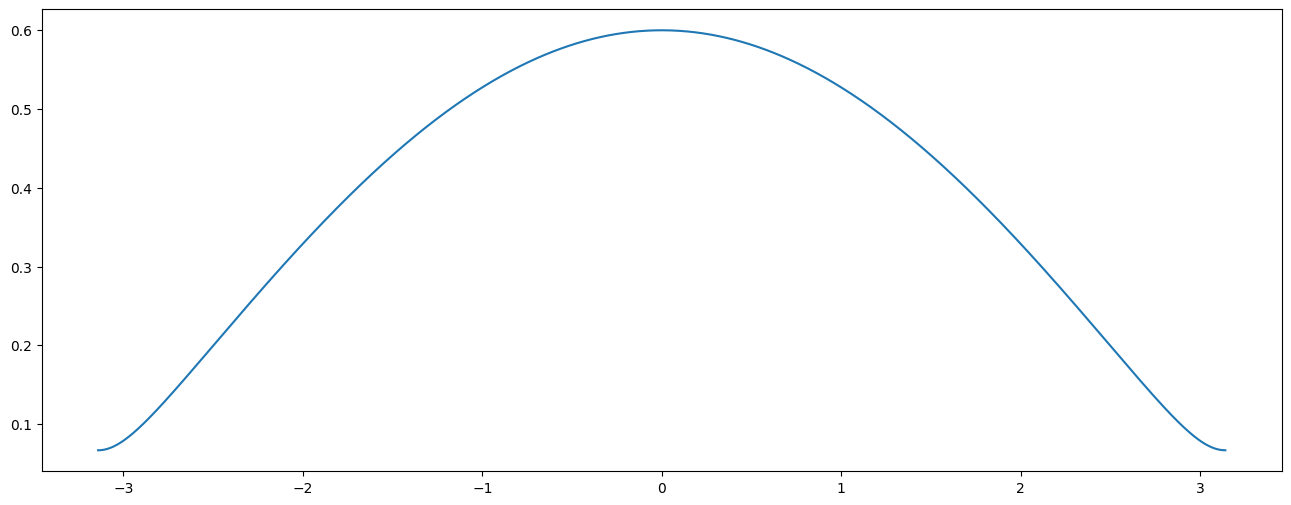

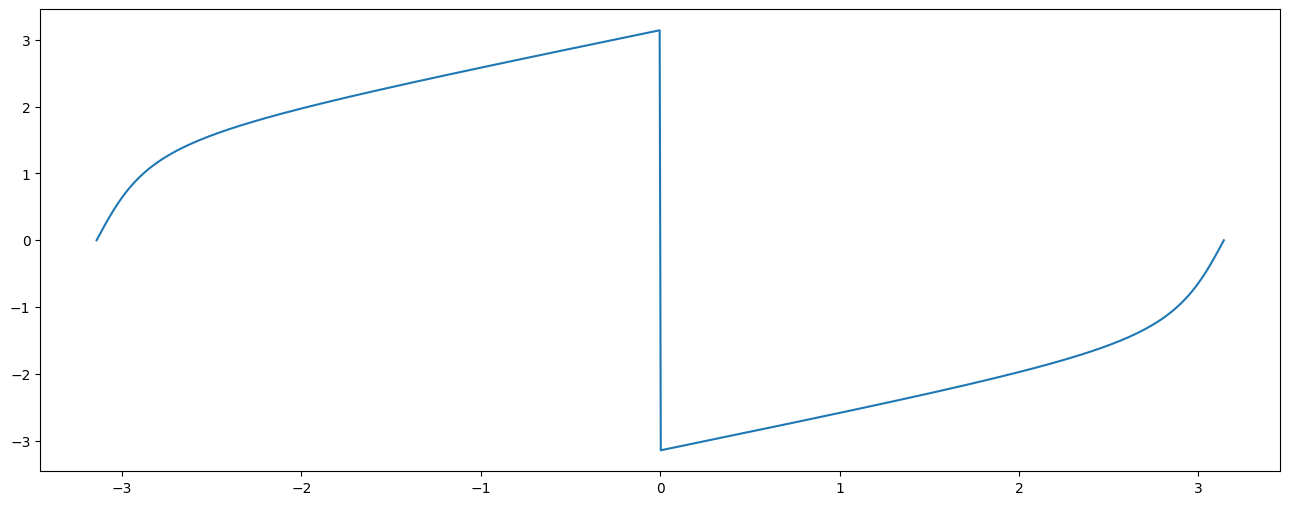

In [54]:
w = np.linspace(-np.pi, np.pi, 1000)

h = (0.3 + 0.24*np.exp(-1j*w))/(-0.9*np.exp(-1j*w))

mag = np.abs(h)
phase = np.angle(h)

plt.plot(w, mag)
plt.show()

plt.plot(w, phase)
plt.show()

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

insert your diagram here

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |              |                    |
|  $\pi/8$ |              |                    |
|  $\pi/4$ |              |                    |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [7]:
# write your code here
